<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/Prediksi_Prevalensi_Stunting_menggunakan_OLS_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

In [120]:
# load google drive
from google.colab import drive
import pandas as pd

In [121]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# load dataset
datasetKompilasiPath = '/content/drive/MyDrive/Kuliah S2/Semester 1/Data Science/dataset/prevalensi_stunting_indonesia.csv'

# load dataset
datasetKompilasi = pd.read_csv(datasetKompilasiPath)

In [123]:
# tampilan meta dataset
datasetKompilasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   target   340 non-null    float64
 1   wilayah  340 non-null    int64  
 2   tahun    340 non-null    int64  
 3   x1       340 non-null    float64
 4   x2       340 non-null    float64
 5   x3       340 non-null    float64
 6   x4       340 non-null    float64
 7   x5       340 non-null    float64
 8   x6       340 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 24.0 KB


In [124]:
datasetKompilasi

,target,wilayah,tahun,x1,x2,x3,x4,x5,x6
0,41.5,1,2013,51.11,95.66,4.05,54.40,40.89,27.80
1,42.5,2,2013,54.34,97.43,2.49,60.99,31.20,39.52
2,39.2,3,2013,55.04,96.61,3.27,63.01,48.08,31.88
3,36.8,4,2013,58.62,97.04,2.65,65.17,44.21,37.43
4,37.9,5,2013,60.54,95.84,2.62,77.46,49.52,42.00
...,...,...,...,...,...,...,...,...,...
335,35.0,30,2022,98.09,1.57,2.90,53.67,71.39,78.98
336,26.1,31,2022,96.75,3.29,5.17,53.39,79.54,92.10
337,26.1,32,2022,97.78,3.21,4.23,51.22,73.38,88.10
338,30.0,33,2022,96.79,7.75,3.45,53.85,72.11,81.57


In [125]:
# load referensi provinsi
datasetProvinsiPath = '/content/drive/MyDrive/Kuliah S2/Semester 1/Data Science/dataset/provinsi.csv'

# load dataset
datasetProvinsi = pd.read_csv(datasetProvinsiPath)

In [126]:
# tampilan meta referensi provinsi
datasetProvinsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  34 non-null     object
dtypes: object(1)
memory usage: 400.0+ bytes


In [127]:
datasetProvinsi

,provinsi
0,Aceh
1,Sumatera Utara
2,Sumatera Barat
3,Riau
4,Jambi
5,Sumatera Selatan
6,Bengkulu
7,Lampung
8,Kep. Bangka Belitung
9,Kep. Riau


In [128]:
tahun = datasetKompilasi.loc[:,['tahun']].drop_duplicates(subset='tahun')

# **Pre-processing**

In [129]:
# pre-processing
from sklearn.preprocessing import StandardScaler

scaler_SS = StandardScaler()
dataTerskala = scaler_SS.fit_transform(datasetKompilasi)

scaler_SS_Without_Year = StandardScaler()
dataTerskala_Without_Year = scaler_SS_Without_Year.fit_transform(datasetKompilasi.loc[:,['target','wilayah','x1','x2','x3','x4','x5','x6']])

In [130]:
# split x & y
dataTerskala_X = dataTerskala[:,1:9]
dataTerskala_Y = dataTerskala[:,0]

In [131]:
# split train & test
from sklearn.model_selection import train_test_split

#split data into x train, y train, x test and y test with 20% of data for testing
x_train, x_test, y_train, y_test = train_test_split(dataTerskala_X, dataTerskala_Y, test_size=0.2)

# **Deklarasi Variable Evaluasi & init Plot**

In [132]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

Provinsi = []
MAE_With_Year = []
MSE_With_Year = []
RMSE_With_Year = []
R2_With_Year = []
MAPE_With_Year = []
MAE_Without_Year = []
MSE_Without_Year = []
RMSE_Without_Year = []
R2_Without_Year = []
MAPE_Without_Year = []

In [133]:
# ploting actual & prediction
import matplotlib.pyplot as plt

# **Ordinary Least Square (OLS) Regression Every Area with or without Year Parameter**

In [134]:
from statsmodels.formula.api import ols
import numpy as np

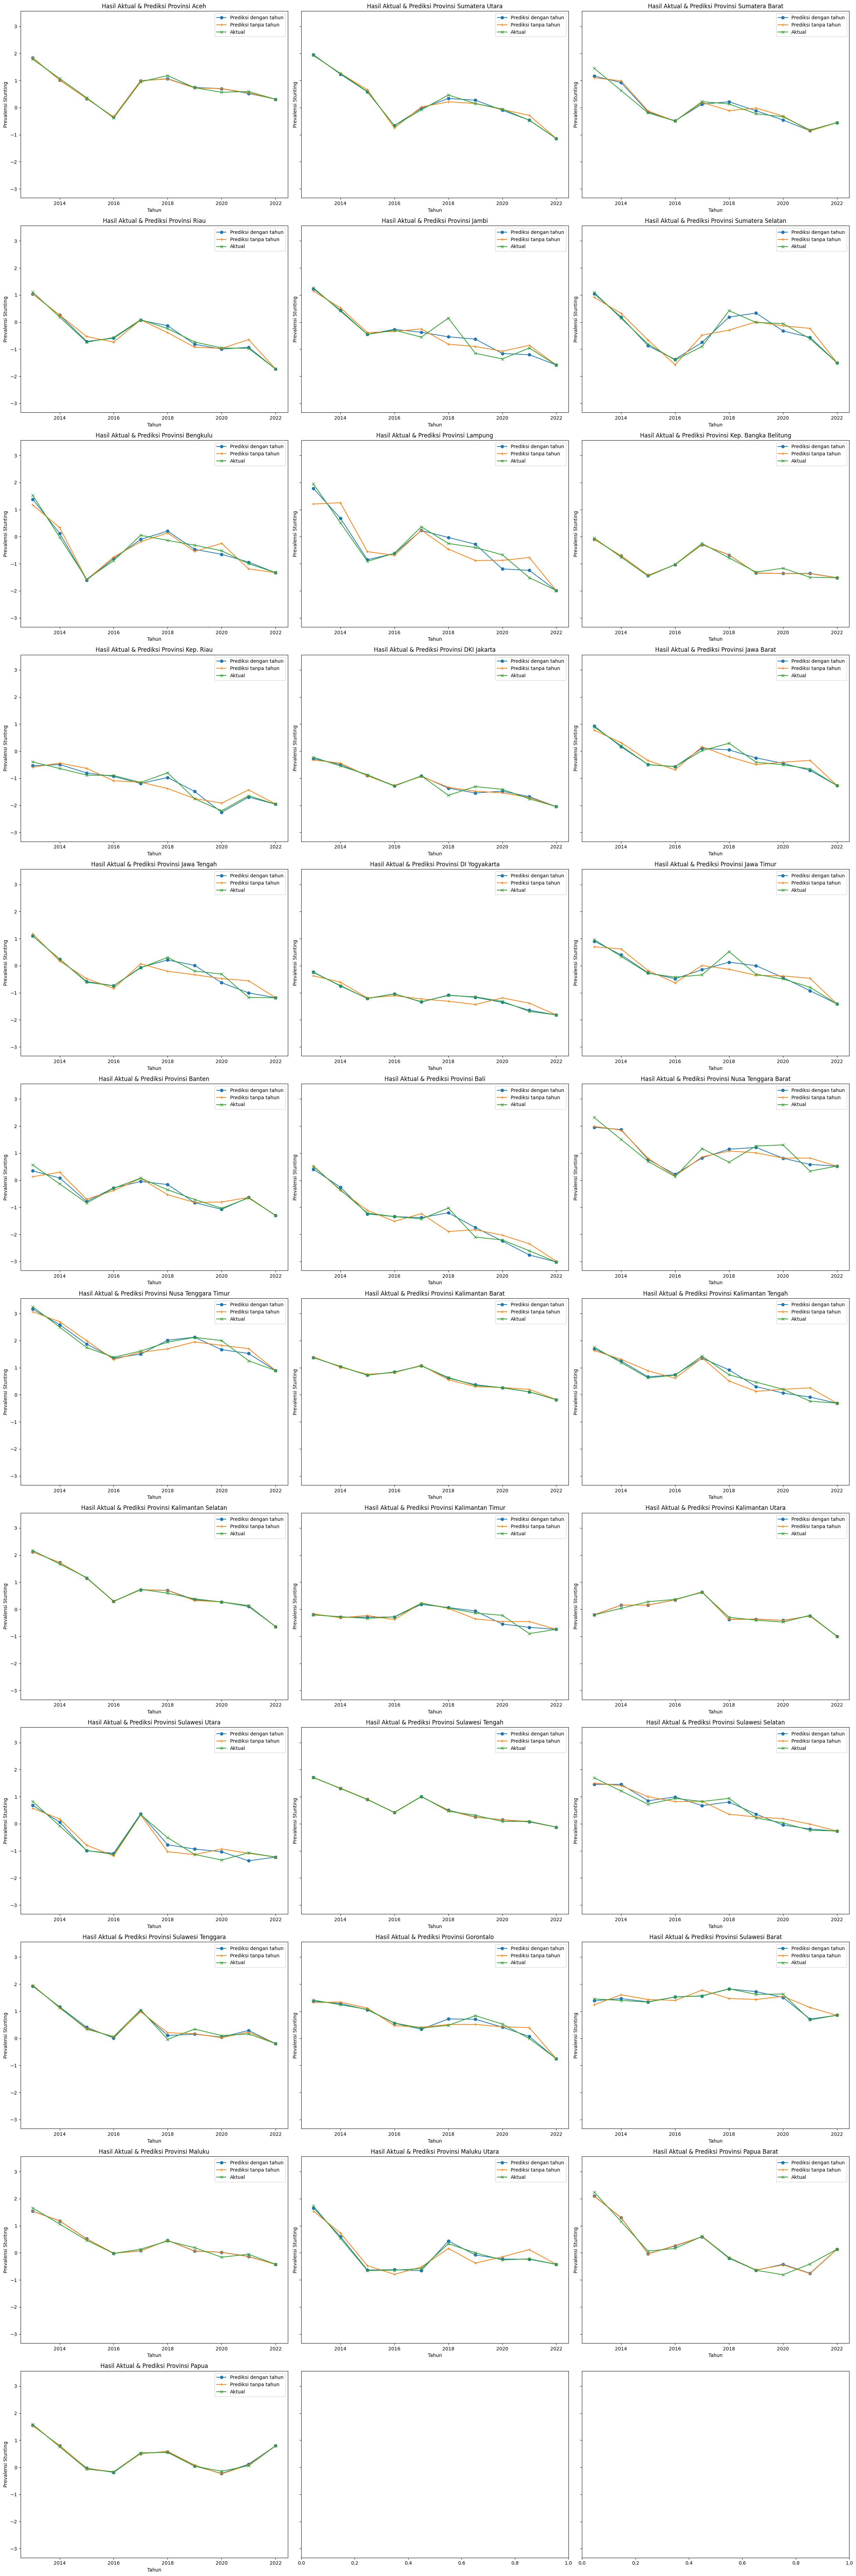

In [135]:
# convert data list to dataframe
dataProvinsiWithYear = pd.DataFrame(dataTerskala, columns=['target', 'wilayah', 'tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])
dataProvinsiWithoutYear = pd.DataFrame(dataTerskala[:,[0,1,3,4,5,6,7,8]], columns=['target', 'wilayah', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

# ploting
plotCol = 0
nCol = 3
fig, axs = plt.subplots(np.ceil(len(datasetProvinsi)/nCol).astype(int), nCol, figsize=(25, 75), sharey=True, tight_layout=True)

for i in datasetProvinsi.index:

  #############
  # with year #
  #############

  # filter data by provinsi
  dataProvinsiSpesifikWithYear = dataProvinsiWithYear.loc[scaler_SS.inverse_transform(dataProvinsiWithYear)[:,1] == (i + 1)]
  dataProvinsiSpesifikWithYear.reset_index(drop=True, inplace=True)
  dataTerskala_Y = dataProvinsiSpesifikWithYear['target']
  dataTerskala_X_With_Tahun = dataProvinsiSpesifikWithYear[['wilayah', 'tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
  dataTerskala_X_Without_Tahun = dataProvinsiSpesifikWithYear[['wilayah', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

  # init model
  olsRegWithYear = ols(formula='target ~ wilayah + tahun + x1 + x2 + x3 + x4 + x5 + x6', data=dataProvinsiSpesifikWithYear)
  modelOls = olsRegWithYear.fit()

  # predict with learned model with year
  olsRegWithYear_pred = modelOls.predict(pd.DataFrame(dataTerskala_X_With_Tahun, columns=['wilayah', 'tahun', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']))

  # evaluate model
  olsRegWithYear_MAE = mean_absolute_error(dataTerskala_Y, olsRegWithYear_pred)
  olsRegWithYear_MSE = mean_squared_error(dataTerskala_Y, olsRegWithYear_pred)
  olsRegWithYear_RMSE = mean_squared_error(dataTerskala_Y, olsRegWithYear_pred, squared=False)
  olsRegWithYear_R2 = r2_score(dataTerskala_Y, olsRegWithYear_pred)
  olsRegWithYear_MAPE = mean_absolute_percentage_error(dataTerskala_Y, olsRegWithYear_pred)

  # push merge evaluate value
  Provinsi.append(datasetProvinsi['provinsi'][i])
  MAE_With_Year.append(olsRegWithYear_MAE)
  MSE_With_Year.append(olsRegWithYear_MSE)
  RMSE_With_Year.append(olsRegWithYear_RMSE)
  R2_With_Year.append(olsRegWithYear_R2)
  MAPE_With_Year.append(olsRegWithYear_MAPE)

  ################
  # without year #
  ################

  # filter data by provinsi
  dataProvinsiSpesifikWithoutYear = dataProvinsiWithoutYear.loc[scaler_SS_Without_Year.inverse_transform(dataProvinsiWithoutYear)[:,1] == (i + 1)]
  dataProvinsiSpesifikWithoutYear.reset_index(drop=True, inplace=True)

  # init model
  olsRegWithoutYear = ols(formula='target ~ wilayah + x1 + x2 + x3 + x4 + x5 + x6', data=dataProvinsiSpesifikWithoutYear)
  modelOlsWithoutYear = olsRegWithoutYear.fit()

  # predict with learned model without year
  olsRegWithoutYear_pred = modelOlsWithoutYear.predict(pd.DataFrame(dataTerskala_X_Without_Tahun, columns=['wilayah', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']))

  # evaluate model
  olsRegWithoutYear_MAE = mean_absolute_error(dataTerskala_Y, olsRegWithoutYear_pred)
  olsRegWithoutYear_MSE = mean_squared_error(dataTerskala_Y, olsRegWithoutYear_pred)
  olsRegWithoutYear_RMSE = mean_squared_error(dataTerskala_Y, olsRegWithoutYear_pred, squared=False)
  olsRegWithoutYear_R2 = r2_score(dataTerskala_Y, olsRegWithoutYear_pred)
  olsRegWithoutYear_MAPE = mean_absolute_percentage_error(dataTerskala_Y, olsRegWithoutYear_pred)

  # push merge evaluate value
  MAE_Without_Year.append(olsRegWithoutYear_MAE)
  MSE_Without_Year.append(olsRegWithoutYear_MSE)
  RMSE_Without_Year.append(olsRegWithoutYear_RMSE)
  R2_Without_Year.append(olsRegWithoutYear_R2)
  MAPE_Without_Year.append(olsRegWithoutYear_MAPE)

  # ploting
  plotRow = np.floor(i / nCol).astype(int)
  plotCol = plotCol if (plotCol < nCol) else 0

  axs[plotRow, plotCol].plot(tahun, olsRegWithYear_pred, marker='o')
  axs[plotRow, plotCol].plot(tahun, olsRegWithoutYear_pred, marker='+')
  axs[plotRow, plotCol].plot(tahun, dataTerskala_Y,  marker='x')

  axs[plotRow, plotCol].set_xlabel('Tahun')
  axs[plotRow, plotCol].set_ylabel('Prevalensi Stunting')

  axs[plotRow, plotCol].set_title(f"Hasil Aktual & Prediksi Provinsi {datasetProvinsi['provinsi'][i]}")
  axs[plotRow, plotCol].legend(['Prediksi dengan tahun', 'Prediksi tanpa tahun', 'Aktual']);

  plotCol += 1

In [136]:
# dictionary of lists
dict = {
  'Provinsi': Provinsi,
  'MAE With Year': MAE_With_Year,
  'MAE Without Year': MAE_Without_Year,
  'MSE With Year': MSE_With_Year,
  'MSE Without Year': MSE_Without_Year,
  'RMSE With Year': RMSE_With_Year,
  'RMSE Without Year': RMSE_Without_Year,
  'MAPE With Year': MAPE_With_Year,
  'MAPE Without Year': MAPE_Without_Year,
}
dataframeEvaluasi = pd.DataFrame(dict)
dataEvaluasi = dataframeEvaluasi.sort_values(['MAE With Year','MSE With Year','RMSE With Year','MAPE With Year'])
dataEvaluasi

,Provinsi,MAE With Year,MAE Without Year,MSE With Year,MSE Without Year,RMSE With Year,RMSE Without Year,MAPE With Year,MAPE Without Year
19,Kalimantan Barat,0.008467,0.035477,0.000158,0.002133,0.012585,0.046182,0.019248,0.128173
13,DI Yogyakarta,0.016662,0.136646,0.000439,0.027928,0.020963,0.167117,0.019187,0.153133
25,Sulawesi Tengah,0.021550,0.022483,0.001031,0.001118,0.032110,0.033441,0.126835,0.119152
21,Kalimantan Selatan,0.032101,0.032531,0.001979,0.002146,0.044490,0.046322,0.060998,0.051600
33,Papua,0.032622,0.035200,0.001567,0.001900,0.039579,0.043594,0.255949,0.254112
29,Sulawesi Barat,0.040512,0.195168,0.003460,0.054320,0.058822,0.233066,0.028618,0.163040
1,Sumatera Utara,0.042597,0.071112,0.003860,0.011844,0.062126,0.108832,0.274358,0.285842
31,Maluku Utara,0.048020,0.179204,0.003408,0.043986,0.058382,0.209729,4.055078,19.275866
23,Kalimantan Utara,0.048604,0.048600,0.004218,0.004222,0.064945,0.064978,0.449574,0.453394
3,Riau,0.049669,0.121402,0.003421,0.024713,0.058485,0.157203,0.143834,0.238099


from matplotlib import pyplot as plt
dataEvaluasi['MAE With Year'].plot(kind='hist', bins=20, title='MAE With Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MAE Without Year'].plot(kind='hist', bins=20, title='MAE Without Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MSE With Year'].plot(kind='hist', bins=20, title='MSE With Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MSE Without Year'].plot(kind='hist', bins=20, title='MSE Without Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi.plot(kind='scatter', x='MAE With Year', y='MAE Without Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi.plot(kind='scatter', x='MAE Without Year', y='MSE With Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi.plot(kind='scatter', x='MSE With Year', y='MSE Without Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi.plot(kind='scatter', x='MSE Without Year', y='RMSE With Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE With Year']
  ys = series['MAE Without Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataEvaluasi.sort_values('MAE With Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE With Year')
_ = plt.ylabel('MAE Without Year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE With Year']
  ys = series['MSE With Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataEvaluasi.sort_values('MAE With Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE With Year')
_ = plt.ylabel('MSE With Year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE With Year']
  ys = series['MSE Without Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataEvaluasi.sort_values('MAE With Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE With Year')
_ = plt.ylabel('MSE Without Year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MAE With Year']
  ys = series['RMSE With Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataEvaluasi.sort_values('MAE With Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MAE With Year')
_ = plt.ylabel('RMSE With Year')

from matplotlib import pyplot as plt
dataEvaluasi['MAE With Year'].plot(kind='line', figsize=(8, 4), title='MAE With Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MAE Without Year'].plot(kind='line', figsize=(8, 4), title='MAE Without Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MSE With Year'].plot(kind='line', figsize=(8, 4), title='MSE With Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataEvaluasi['MSE Without Year'].plot(kind='line', figsize=(8, 4), title='MSE Without Year')
plt.gca().spines[['top', 'right']].set_visible(False)